# Kaggle Competition: House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
## Part 1: Exploratory Data Analysis
### Outline:
1. Preparation
    * 1.1 Importing Libraries
    * 1.2 Importing Data
    * 1.3 Understanding the dataset
    * 1.4 Definition of Analysis Functions
2. Numerical Analysis
    * 2.1 Dependant Variable
    * 2.2 Feature viszualisations
    * 2.3 Feature distributions
3. Categorical Variables
    * 3.1 Feature visualizations
4. Data Wrangling
    * 4.1 Excessive Multicollinearity
    * 4.2 Imputation of missing values

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Importing Data

train_df = pd.read_csv('train.csv', index_col='Id')

In [3]:
### Understanding the Dataset

train_df.shape

(1460, 80)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The given dataset consists of cross-sectional data with 80 features (excluding the id) and 1460 observations. The problem at hand is a numerical regression problem.

Null-entries are present in the data set and will be examined. Features with less than 25% missing values will be imputed if possible and necessary.

This analysis will start out with the 37 numerical features and will then examine the 43 categorical features.

In [6]:
# Definition of analysis function
def num_analysis(subject,droplist=None,target='SalePrice',data=train_df,correlation_ranks=5,drop_add=False,reg_order=1):
    # Calculation of basic statistics
    print(data[subject].describe())
    print('Skewness: {}'.format(data[subject].skew()))
    print('Kurtosis: {}'.format(data[subject].kurt()))
    
    # Calculation of correlation with target and to other features
    if subject!= target:
        target_corr = data.loc[:,[subject,target]].corr().loc[subject][1]
        print('Correlation to target: '.format(target_corr))
        print(target_corr)
    corr_ranks = data.corr().loc[subject].transform(lambda x:abs(x)).sort_values(ascending=False).head(correlation_ranks+1)[1:]
    print('Top correlations:\n{}'.format(corr_ranks))
    
    # Show distribution and relation to target
    plt.subplot(1,2,1)
    sns.distplot(data[subject].dropna(),hist=True)
    plt.subplot(1,2,2)
    sns.regplot(x=subject,y=target,data=data,order=reg_order)
    
    # Calculate amount of missing data
    missing_abs = data.loc[:,subject].isnull().sum()
    missing_rel = data.loc[:,subject].isnull().mean()
    print('Amount of missing data: {} ({}%)'.format(missing_abs,missing_rel*100))
    
    # Add feature to droplist if drop_add == True
    if drop_add and (subject not in droplist):
        droplist.append[subject]
        
    return droplist

In [7]:
def cat_analysis(subject,droplist=None,target='SalePrice',data=train_df,drop_add=False):
    
    # Amount of missing data
    print('Amount of missing data: {} ({}%)'.format(data.loc[:,subject].isnull().sum(),data.loc[:,subject].isnull().mean()*100))
    
    # Visualization
    sns.boxplot(x=subject,y=target,data=data)
    
    # Appending to droplist
    if drop_add and (subject not in droplist):
        droplist.append(subject)
        
    return droplist

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
Top correlations:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64
Amount of missing data: 0 (0.0%)


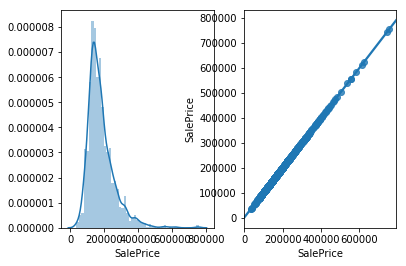

In [8]:
# The dependant variable
num_analysis('SalePrice')

There appear to be a few highly linearly correlated features in the dataset, suggesting, that there will be some success wit linear methods.
The dependant variable is not normally distributed, but the density plot suggests, that that may be alleviated, by logarithmization them.

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


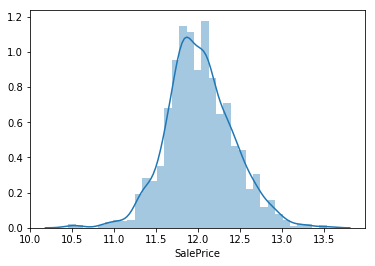

In [9]:
sns.distplot(train_df['SalePrice'].transform(lambda x: np.log(x)))
print('Skewness: {}'.format(train_df['SalePrice'].transform(lambda x: np.log(x)).skew()))
print('Kurtosis: {}'.format(train_df['SalePrice'].transform(lambda x: np.log(x)).kurt()))
# Indeed, the distribution seems closer to the normal distribution now.
train_df['SalePrice_log'] = train_df['SalePrice'].transform(lambda x: np.log(x))
train_df = train_df.drop('SalePrice',axis=1)

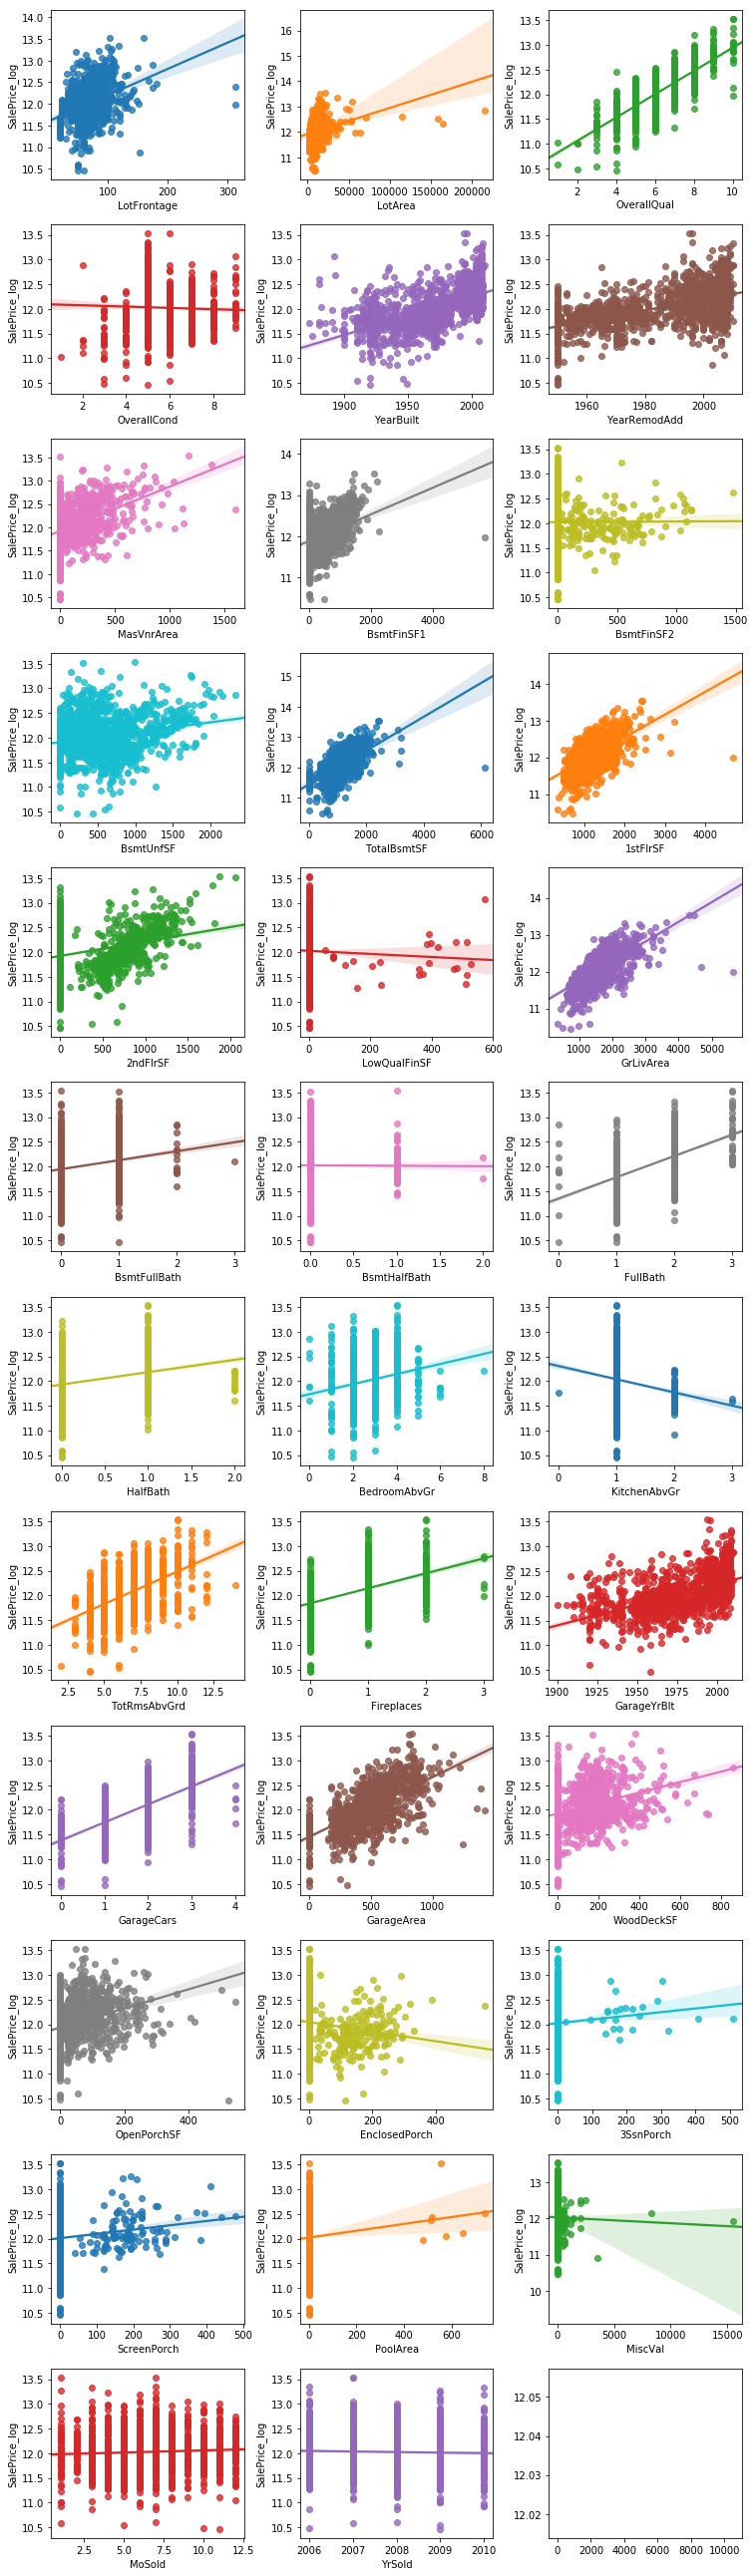

In [10]:
# Overview of feature correlations
n_cols = 3
n_rows = 12
num_features = [feature for feature in train_df if train_df[feature].dtype != 'object' and feature != 'SalePrice_log']
i = 0

fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3))

for row in range(n_rows):
    for col in range(n_cols):
        if i+1 < len(num_features):
            i += 1
            sns.regplot(x=num_features[i],y='SalePrice_log',data=train_df,ax = ax[row][col])
            
plt.tight_layout()
plt.show()

It appears, that all relationships between features are either linear or quadratic at most. Several features appear to have a strong impact on on Sales Prices (like OverallQual) and some appear to have no meaningful impact (like the MoSold or EnclosedPorch).

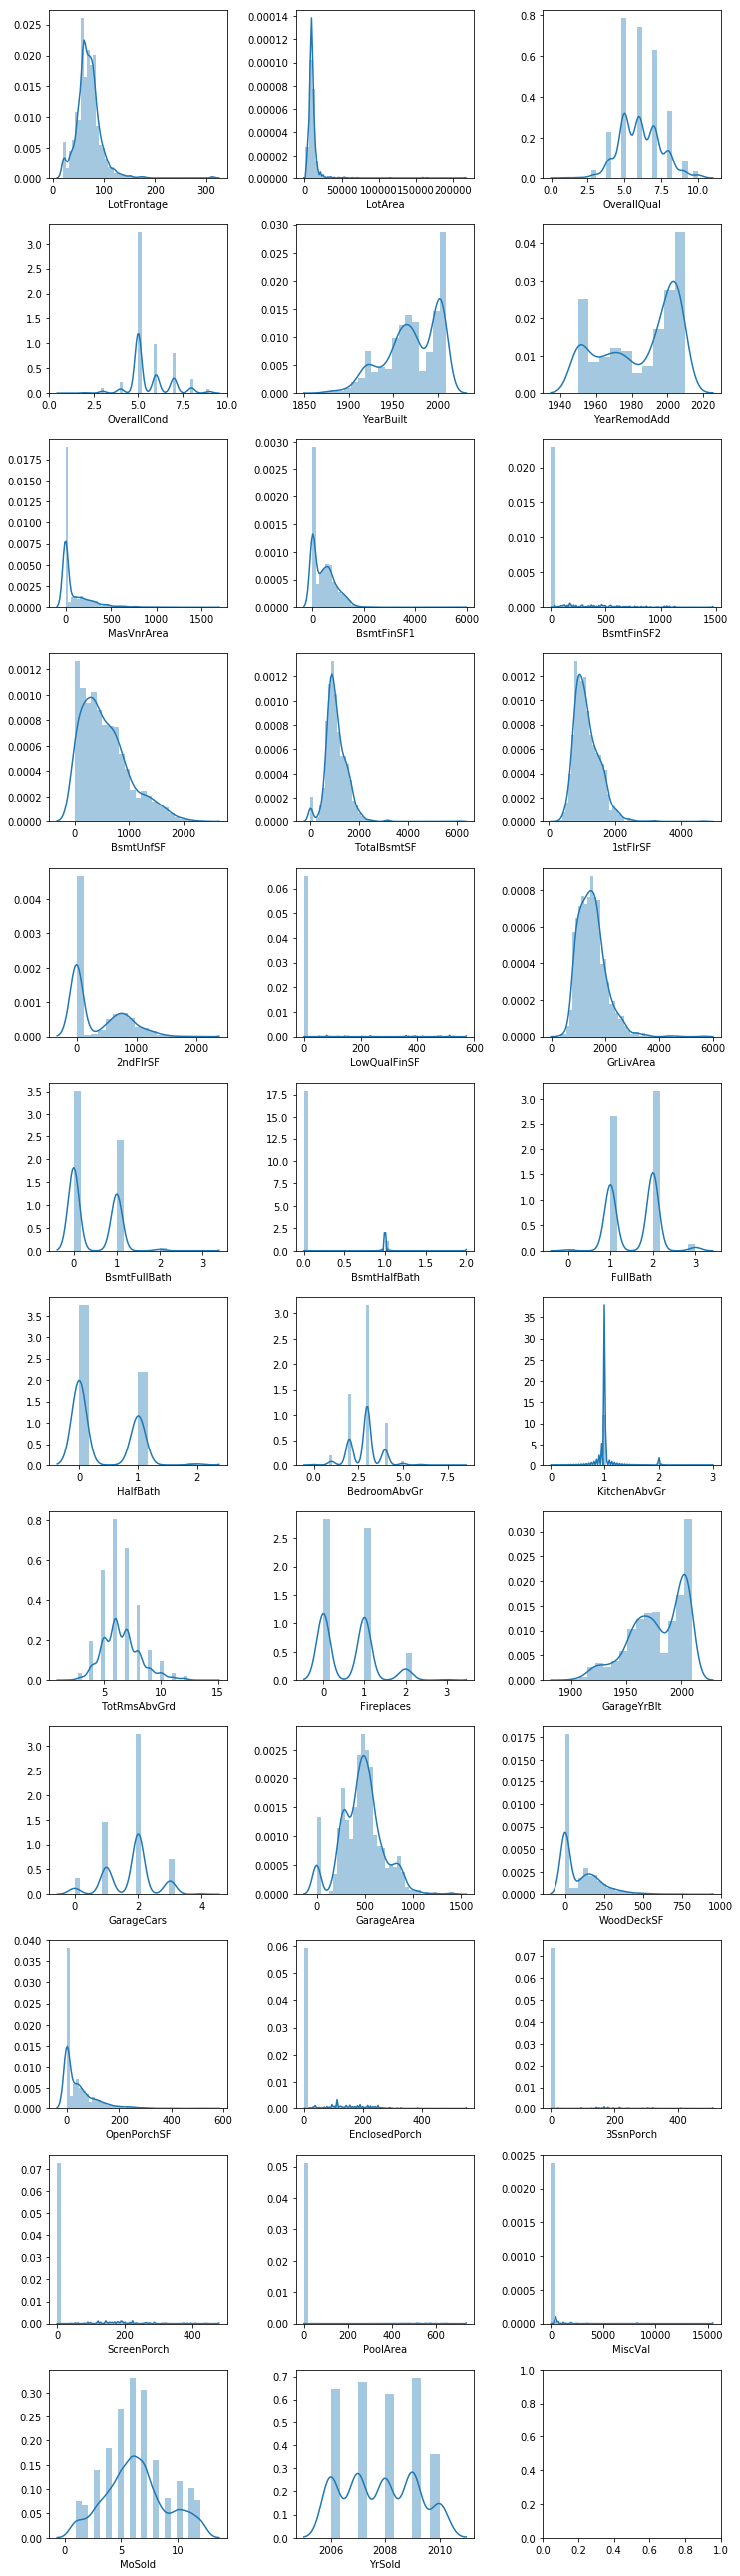

In [21]:
# Examining the distribution of numerical features
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3))
i=0

for row in range(n_rows):
    for col in range(n_cols):
        if i+1 < len(num_features):
            i+=1
            sns.distplot(train_df[num_features[i]].dropna(),ax = ax [row][col])
            
plt.tight_layout()
plt.show()

As most of the features are generally not normal, the normalization transformation of sklearn will be needed before machine learning algorithms can be applied. The largely differing scales of the feature also calls for the use of the StandardScaler transformation.

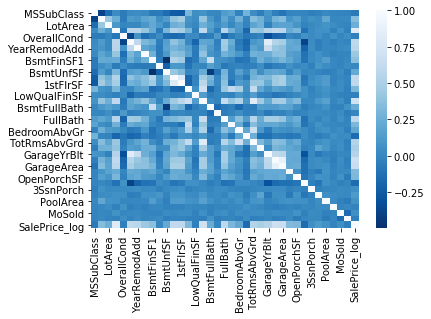

In [11]:
# Examination of multicollinearity
sns.heatmap(train_df.corr(),cmap='Blues_r')
# There appear to be some highly correlated features in the dataset

Features with excessive multicollinearity have been identified. The feature with a lower correlation to the target feature was dropped from the dataset.

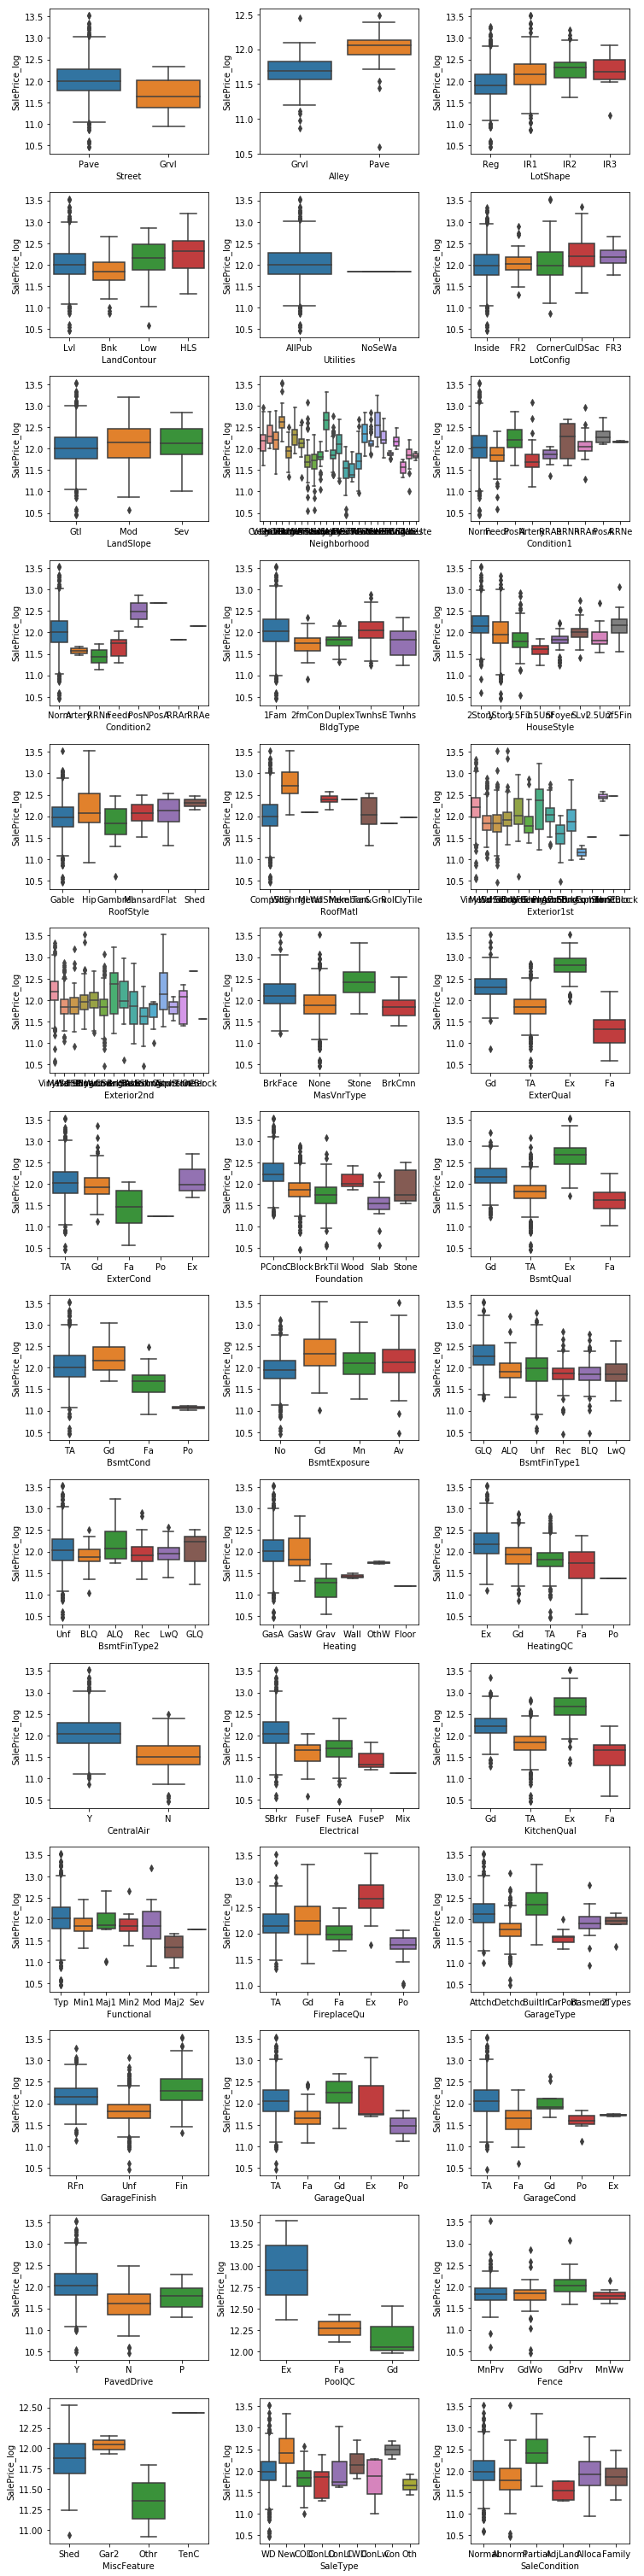

In [59]:
# Examination of categorical features

cat_features = [obj for obj in train_df if train_df[obj].dtype == 'object']

rows = 14
cols = 3

fig, ax = plt.subplots(rows,cols,figsize=(cols*3.5,rows*3))
i = 0

for row in range(rows):
    for col in range(cols):
        if i+1<len(cat_features):
            i+=1
            sns.boxplot(x=cat_features[i],y='SalePrice_log',data = train_df,ax = ax [row][col])
            
plt.tight_layout()
plt.show()